PART 1 - Explore CSV files containing daily vaccination data per country as well as daily vaccination data broken down by manufacturer.

AIM: This portion of the project aims to assess vaccine rollout per country and furthermore per manufacturer with two main goals. The countries will be arranged by region in order to facilitate visualization and obtain a more worldwide picture.

The first goal is to create a dataframe and visualizations that will aid my teammates in parts three and four as they will analyze the potential correlation between the vaccine rollout per country and their respective topics (covid-related deaths and the economy).

The second goal is to assess vaccine rollout per manufacturer and, using the data provided by my teammate in part 1, analyze a potential correlation between this rollout and stock value of each vaccination company.

Research Question: What was the rollout of covid-19 vaccines around the world and can the manufacturer-specific rollout explain the differences in stock value from company to company?

In [1]:
#Import dependencies

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#Load the appropriate datasets and read them

vaccination_data_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Resources/vaccinations1.csv")
manufacturer_data_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Resources/vaccinations-by-manufacturer.csv")

vaccination_data = pd.read_csv(vaccination_data_to_load)
manufacturer_data = pd.read_csv(manufacturer_data_to_load)

In [3]:
vaccination_data.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [4]:
manufacturer_data.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,2020-12-29,Sinopharm/Beijing,1
2,Argentina,2020-12-29,Sputnik V,20493
3,Argentina,2020-12-30,Sputnik V,40595
4,Argentina,2020-12-31,Sputnik V,43401


In [5]:
#Drop the unnecessary columns in the first dataset
columns_to_keep = ["location", "date", "total_vaccinations","people_vaccinated", "people_fully_vaccinated", "total_boosters"]
new_vaccine_df = vaccination_data[columns_to_keep]
new_vaccine_df.head()

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN


In [6]:
#rename columns for a more refined looking dataset
vaccination_cleaned_df = new_vaccine_df.rename(columns={"total_vaccinations": "Total Vaccinations per Location", "people_vaccinated": "People Vaccinated", "people_fully_vaccinated": "People Fully Vaccinated", "total_boosters": "Total Boosters"})
manufacturer_data_cleaned = manufacturer_data.rename(columns={"total_vaccinations": "Total Vaccinations per Manufacturer"})

In [7]:
vaccination_cleaned_df.head()

,location,date,Total Vaccinations per Location,People Vaccinated,People Fully Vaccinated,Total Boosters
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN


In [8]:
manufacturer_data_cleaned.head()

,location,date,vaccine,Total Vaccinations per Manufacturer
0,Argentina,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,2020-12-29,Sinopharm/Beijing,1
2,Argentina,2020-12-29,Sputnik V,20493
3,Argentina,2020-12-30,Sputnik V,40595
4,Argentina,2020-12-31,Sputnik V,43401


In [9]:
#load csv file provided by teammate in order to arrange countries by set of defined regions
regions_df_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/nazim/Output/output_countries_list_who_referential.csv")
regions_df = pd.read_csv(regions_df_to_load)

regions_df.head()

,Unnamed: 0,id,iso2Code,name,region,capitalCity,longitude,latitude
0,0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.5167
1,1,AFE,ZH,Africa Eastern and Southern,Aggregates,NaN,NaN,NaN
2,2,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.5228
3,3,AFR,A9,Africa,Aggregates,NaN,NaN,NaN
4,4,AFW,ZI,Africa Western and Central,Aggregates,NaN,NaN,NaN


In [11]:
#clean up dataset above by only keeping essential columns for region classification
columns_kept = ["name", "region"]
regions_df_cleaned = regions_df[columns_kept]

regions_df_refined = regions_df_cleaned.rename(columns={"name": "location"})
regions_df_refined.head()

,location,region
0,Aruba,Latin America & Caribbean
1,Africa Eastern and Southern,Aggregates
2,Afghanistan,South Asia
3,Africa,Aggregates
4,Africa Western and Central,Aggregates


In [12]:
#Find unique countries to know how to group by region, preferred method for for visualization to avoid crowding if done by location
unique_countries = manufacturer_data_cleaned["location"].unique()
unique_countries

array(['Argentina', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Chile',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Estonia',
       'Finland', 'France', 'Germany', 'Hong Kong', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Nepal', 'Netherlands',
       'Norway', 'Peru', 'Poland', 'Portugal', 'Romania', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'United States', 'Uruguay',
       'European Union'], dtype=object)

In [13]:
#load csv file provided by teammate in order to arrange countries by set of defined regions
merged_vaccination_df = pd.merge(regions_df_refined, vaccination_cleaned_df, on="location")
merged_manufacturer_df = pd.merge(regions_df_refined, manufacturer_data_cleaned, on="location")

In [14]:
merged_manufacturer_df.head()

,location,region,date,vaccine,Total Vaccinations per Manufacturer
0,Argentina,Latin America & Caribbean,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,Latin America & Caribbean,2020-12-29,Sinopharm/Beijing,1
2,Argentina,Latin America & Caribbean,2020-12-29,Sputnik V,20493
3,Argentina,Latin America & Caribbean,2020-12-30,Sputnik V,40595
4,Argentina,Latin America & Caribbean,2020-12-31,Sputnik V,43401


In [15]:
merged_vaccination_df.head()

,location,region,date,Total Vaccinations per Location,People Vaccinated,People Fully Vaccinated,Total Boosters
0,Aruba,Latin America & Caribbean,2021-03-29,25766.0,15600.0,10166.0,NaN
1,Aruba,Latin America & Caribbean,2021-03-30,NaN,NaN,NaN,NaN
2,Aruba,Latin America & Caribbean,2021-03-31,NaN,NaN,NaN,NaN
3,Aruba,Latin America & Caribbean,2021-04-01,NaN,NaN,NaN,NaN
4,Aruba,Latin America & Caribbean,2021-04-02,NaN,NaN,NaN,NaN


In [16]:
#Export as usable csv files
vaccinations_path = "Output/merged_vaccination_df.csv"
merged_vaccination_df.to_csv(vaccinations_path)

manufacturer_path = "Output/merged_manufacturer_df.csv"
merged_manufacturer_df.to_csv(manufacturer_path)

In [17]:
#list all regions to know which plots to create in the visualizations
unique_regions = merged_vaccination_df["region"].unique()
print(unique_regions)

['Latin America & Caribbean ' 'South Asia' 'Aggregates'
 'Sub-Saharan Africa ' 'Europe & Central Asia'
 'Middle East & North Africa' 'East Asia & Pacific' 'North America']


In [18]:
#Find unique manufacturers to help teammate know which stock data to collect
unique_manufacturers = manufacturer_data_cleaned["vaccine"].unique()
print(unique_manufacturers)

['Oxford/AstraZeneca' 'Sinopharm/Beijing' 'Sputnik V' 'Pfizer/BioNTech'
 'Moderna' 'CanSino' 'Sputnik Light' 'Johnson&Johnson' 'Novavax'
 'Sanofi/GSK' 'Valneva' 'Medicago' 'Sinovac' 'Covaxin' 'SKYCovione']


PART 2 - Visualizations of data, allowing us to get a clear picture of the respective vaccine rollouts

2.1 Vaccine rollout in general, per region.

In [19]:
merged_vaccine_df_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Output/merged_vaccination_df.csv")
merged_df = pd.read_csv(merged_vaccine_df_to_load)
merged_df.head()

,Unnamed: 0,location,region,date,Total Vaccinations per Location,People Vaccinated,People Fully Vaccinated,Total Boosters
0,0,Aruba,Latin America & Caribbean,2021-03-29,25766.0,15600.0,10166.0,NaN
1,1,Aruba,Latin America & Caribbean,2021-03-30,NaN,NaN,NaN,NaN
2,2,Aruba,Latin America & Caribbean,2021-03-31,NaN,NaN,NaN,NaN
3,3,Aruba,Latin America & Caribbean,2021-04-01,NaN,NaN,NaN,NaN
4,4,Aruba,Latin America & Caribbean,2021-04-02,NaN,NaN,NaN,NaN


In [20]:
columns_tokeep = ["region", "date", "Total Vaccinations per Location"]
refined_vaccination_df = merged_df[columns_tokeep]
refined_vaccination_df.head()

,region,date,Total Vaccinations per Location
0,Latin America & Caribbean,2021-03-29,25766.0
1,Latin America & Caribbean,2021-03-30,NaN
2,Latin America & Caribbean,2021-03-31,NaN
3,Latin America & Caribbean,2021-04-01,NaN
4,Latin America & Caribbean,2021-04-02,NaN


In [21]:
#Identify unique regions in this dataframe to break down the visualizations
unique_regions1 = refined_vaccination_df["region"].unique()
print(unique_regions1)

['Latin America & Caribbean ' 'South Asia' 'Aggregates'
 'Sub-Saharan Africa ' 'Europe & Central Asia'
 'Middle East & North Africa' 'East Asia & Pacific' 'North America']


In [22]:
#Export this new refined vaccine dataframe as a usable csv file
refined_vaccinations_path = "Output/refined_vaccination_df.csv"
refined_vaccination_df.to_csv(refined_vaccinations_path)

refined_vaccine_df_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Output/refined_vaccination_df.csv")
refined_vaccination_df = pd.read_csv(refined_vaccine_df_to_load)
refined_vaccination_df.head()

,Unnamed: 0,region,date,Total Vaccinations per Location
0,0,Latin America & Caribbean,2021-03-29,25766.0
1,1,Latin America & Caribbean,2021-03-30,NaN
2,2,Latin America & Caribbean,2021-03-31,NaN
3,3,Latin America & Caribbean,2021-04-01,NaN
4,4,Latin America & Caribbean,2021-04-02,NaN


In [23]:
#Add year column for subsequent visualizations
refined_vaccination_df.loc[:, "date"] = pd.to_datetime(refined_vaccination_df["date"], errors="coerce")
refined_vaccination_df.loc[:, "year"] = refined_vaccination_df["date"].apply(lambda x: x.year if pd.notnull(x) else None)

refined_vaccination_df.head()

,Unnamed: 0,region,date,Total Vaccinations per Location,year
0,0,Latin America & Caribbean,2021-03-29 00:00:00,25766.0,2021
1,1,Latin America & Caribbean,2021-03-30 00:00:00,NaN,2021
2,2,Latin America & Caribbean,2021-03-31 00:00:00,NaN,2021
3,3,Latin America & Caribbean,2021-04-01 00:00:00,NaN,2021
4,4,Latin America & Caribbean,2021-04-02 00:00:00,NaN,2021


In [24]:
#Export this new refined vaccine dataframe with year column as a usable csv file
refined_vaccinations_path = "Output/refined_vaccination_df.csv"
refined_vaccination_df.to_csv(refined_vaccinations_path)

refined_vaccine_df_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Output/refined_vaccination_df.csv")
final_vaccine_df = pd.read_csv(refined_vaccine_df_to_load)
final_vaccine_df.head()

,Unnamed: 0.1,Unnamed: 0,region,date,Total Vaccinations per Location,year
0,0,0,Latin America & Caribbean,2021-03-29 00:00:00,25766.0,2021
1,1,1,Latin America & Caribbean,2021-03-30 00:00:00,NaN,2021
2,2,2,Latin America & Caribbean,2021-03-31 00:00:00,NaN,2021
3,3,3,Latin America & Caribbean,2021-04-01 00:00:00,NaN,2021
4,4,4,Latin America & Caribbean,2021-04-02 00:00:00,NaN,2021


In [25]:
#Filter for South Asia as the first region to analyze total vaccine rollout for
sa_region = refined_vaccination_df[refined_vaccination_df["region"] == "South Asia"]

print(sa_region.shape)
print(sa_region)

(7719, 5)
        Unnamed: 0      region                 date  \
1080          1080  South Asia  2021-02-22 00:00:00   
1081          1081  South Asia  2021-02-23 00:00:00   
1082          1082  South Asia  2021-02-24 00:00:00   
1083          1083  South Asia  2021-02-25 00:00:00   
1084          1084  South Asia  2021-02-26 00:00:00   
...            ...         ...                  ...   
116301      116301  South Asia  2023-11-10 00:00:00   
116302      116302  South Asia  2023-11-11 00:00:00   
116303      116303  South Asia  2023-11-12 00:00:00   
116304      116304  South Asia  2023-11-13 00:00:00   
116305      116305  South Asia  2023-11-14 00:00:00   

        Total Vaccinations per Location  year  
1080                                0.0  2021  
1081                                NaN  2021  
1082                                NaN  2021  
1083                                NaN  2021  
1084                                NaN  2021  
...                                 ...  

In [26]:


yearly_sa_data = sa_region.groupby("year")["Total Vaccinations per Location"].sum()

plt.plot(yearly_sa_data["year"], yearly_sa_data["Total Vaccinations per Location"])
plt.title("Total Vaccinations for South Asia")
plt.xlabel("Year")
plt.ylabel("Total Vaccinations")
plt.xticks(yearly_sa_data["year"])
plt.show()

KeyError: 'year'

2.2 Vaccine rollout per manufacturer, per region

In [199]:
#Load csv dataset containing vaccine rollout per manufacturer for visualization
manufacturer_merged_data_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Output/merged_manufacturer_df.csv")
manufacturers_df = pd.read_csv(manufacturer_merged_data_to_load)

manufacturers_df.head()

,Unnamed: 0,location,region,date,vaccine,Total Vaccinations per Manufacturer
0,0,Argentina,Latin America & Caribbean,2020-12-29,Oxford/AstraZeneca,1
1,1,Argentina,Latin America & Caribbean,2020-12-29,Sinopharm/Beijing,1
2,2,Argentina,Latin America & Caribbean,2020-12-29,Sputnik V,20493
3,3,Argentina,Latin America & Caribbean,2020-12-30,Sputnik V,40595
4,4,Argentina,Latin America & Caribbean,2020-12-31,Sputnik V,43401


In [200]:
#Identify unique regions in this dataframe to break down the visualizations
unique_regions = manufacturers_df["region"].unique()
print(unique_regions)

['Latin America & Caribbean ' 'Europe & Central Asia' 'North America'
 'Aggregates' 'East Asia & Pacific' 'Middle East & North Africa'
 'South Asia' 'Sub-Saharan Africa ']


In [201]:
#Identify unique countries in this dataframe to inform analysis of regions as more or less complete
unique_countries = manufacturers_df["location"].unique()
print(unique_countries)

['Argentina' 'Austria' 'Belgium' 'Bulgaria' 'Canada' 'Switzerland' 'Chile'
 'Cyprus' 'Czechia' 'Germany' 'Denmark' 'Ecuador' 'Spain' 'Estonia'
 'European Union' 'Finland' 'France' 'Croatia' 'Hungary' 'Ireland'
 'Iceland' 'Italy' 'Japan' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Latvia' 'Malta' 'Netherlands' 'Norway' 'Nepal' 'Peru' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Sweden' 'Ukraine' 'Uruguay'
 'United States' 'South Africa']


In [202]:
#Rename regions to allow for manipulation of data
manufacturers_df["region"] = manufacturers_df["region"].str.strip()
replacements = {
    "Latin America & Caribbean": "Latin America and Caribbean", 
    "Europe & Central Asia": "Europe and Central Asia", "East Asia & Pacific": "East Asia and Pacific", 
    "Middle East & North Africa": "Middle East and North Africa"
    }
manufacturers_df["region"] = manufacturers_df["region"].replace(replacements)
manufacturers_df.head()

,Unnamed: 0,location,region,date,vaccine,Total Vaccinations per Manufacturer
0,0,Argentina,Latin America and Caribbean,2020-12-29,Oxford/AstraZeneca,1
1,1,Argentina,Latin America and Caribbean,2020-12-29,Sinopharm/Beijing,1
2,2,Argentina,Latin America and Caribbean,2020-12-29,Sputnik V,20493
3,3,Argentina,Latin America and Caribbean,2020-12-30,Sputnik V,40595
4,4,Argentina,Latin America and Caribbean,2020-12-31,Sputnik V,43401


In [203]:
#Filter for South Asia as the first region to be plotted
sa_vaccinations = manufacturers_df[manufacturers_df["region"] == "South Asia"]

print(sa_vaccinations.head())
print(sa_vaccinations.dtypes)

       Unnamed: 0 location      region        date             vaccine  \
50120       50120    Nepal  South Asia  2022-02-19     Johnson&Johnson   
50121       50121    Nepal  South Asia  2022-02-19  Oxford/AstraZeneca   
50122       50122    Nepal  South Asia  2022-02-19     Pfizer/BioNTech   
50123       50123    Nepal  South Asia  2022-02-19   Sinopharm/Beijing   
50124       50124    Nepal  South Asia  2022-02-20     Johnson&Johnson   

       Total Vaccinations per Manufacturer  
50120                              3005246  
50121                              9247554  
50122                               485819  
50123                             18974500  
50124                              3012420  
Unnamed: 0                              int64
location                               object
region                                 object
date                                   object
vaccine                                object
Total Vaccinations per Manufacturer     int64
dtype: ob

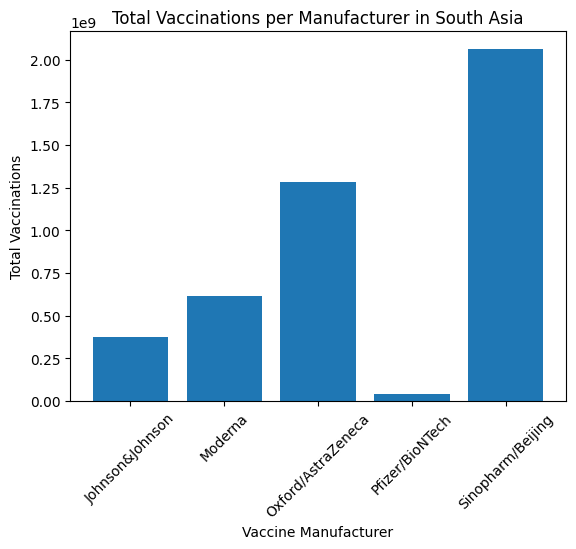

<Figure size 640x480 with 0 Axes>

In [204]:
#Plot a bar chart displaying total number of vaccines administered in South Asia

#First, ensure that the total vaccinations column is in fact numeric
manufacturers_df["Total Vaccinations per Manufacturer"] = pd.to_numeric(manufacturers_df["Total Vaccinations per Manufacturer"], errors='coerce')

#Plot for South Asia, ensuring that total vaccinations are summed for each vaccine type
sa_df = manufacturers_df[manufacturers_df["region"] == "South Asia"]
grouped_data = sa_df.groupby("vaccine", as_index=False)["Total Vaccinations per Manufacturer"].sum()
plt.bar(grouped_data["vaccine"], grouped_data["Total Vaccinations per Manufacturer"])
plt.title("Total Vaccinations per Manufacturer in South Asia")
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.show()

plt.savefig("Output/total_vaccinations_southasia_barchart.png")

As seen on the graph, the top 3 vaccines administered in South Asia are SinoPharm, AstraZeneca and Moderna. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat/limitation: Nepal is the only country provided in this dataset, resulting in limited analysis for South Asia as a whole.

In [205]:
#Filter for North America as the second region to be plotted
na_vaccinations = manufacturers_df[manufacturers_df["region"] == "North America"]

print(na_vaccinations.head())
print(na_vaccinations.dtypes)

      Unnamed: 0 location         region        date          vaccine  \
6499        6499   Canada  North America  2020-12-19  Pfizer/BioNTech   
6500        6500   Canada  North America  2020-12-26  Pfizer/BioNTech   
6501        6501   Canada  North America  2021-01-02          Moderna   
6502        6502   Canada  North America  2021-01-02  Pfizer/BioNTech   
6503        6503   Canada  North America  2021-01-09          Moderna   

      Total Vaccinations per Manufacturer  
6499                                12360  
6500                                46153  
6501                                 1778  
6502                                67350  
6503                                46739  
Unnamed: 0                              int64
location                               object
region                                 object
date                                   object
vaccine                                object
Total Vaccinations per Manufacturer     int64
dtype: object


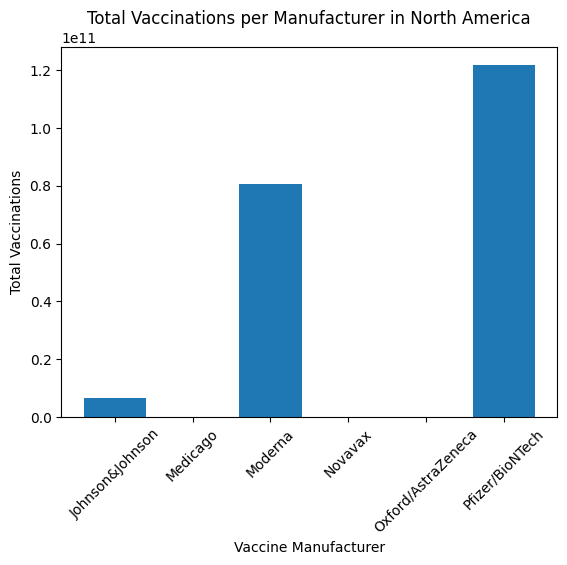

<Figure size 640x480 with 0 Axes>

In [210]:
#Plot a bar chart displaying total number of vaccines administered in North America

#First, ensure that the total vaccinations column is in fact numeric
manufacturers_df["Total Vaccinations per Manufacturer"] = pd.to_numeric(manufacturers_df["Total Vaccinations per Manufacturer"], errors='coerce')

#Plot for North America, ensuring that total vaccinations are summed for each vaccine type
na_df = manufacturers_df[manufacturers_df["region"] == "North America"]
grouped_data = na_df.groupby("vaccine", as_index=False)["Total Vaccinations per Manufacturer"].sum()
plt.bar(grouped_data["vaccine"], grouped_data["Total Vaccinations per Manufacturer"])
plt.title("Total Vaccinations per Manufacturer in North America")
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.show()

plt.savefig("Output/total_vaccinations_northamerica_barchart.png")

As seen on the graph, the top 3 vaccines administered in North America are Pfizer, Moderna and Johnson&Johnson. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Note: Major countries of North America such as Canada and the US, representing a very large portion of the population of the region are present in this dataset. This is more indicative of the reality of the situation than for South Asia where major players such as India and Pakistan are missing.

In [207]:
#Filter for South America as the third region to be plotted
specificregion1 = "Latin America and Caribbean"
saca_vaccinations = manufacturers_df[manufacturers_df["region"] == specificregion1]

print(saca_vaccinations.head())
print(saca_vaccinations.dtypes)

   Unnamed: 0   location                       region        date  \
0           0  Argentina  Latin America and Caribbean  2020-12-29   
1           1  Argentina  Latin America and Caribbean  2020-12-29   
2           2  Argentina  Latin America and Caribbean  2020-12-29   
3           3  Argentina  Latin America and Caribbean  2020-12-30   
4           4  Argentina  Latin America and Caribbean  2020-12-31   

              vaccine  Total Vaccinations per Manufacturer  
0  Oxford/AstraZeneca                                    1  
1   Sinopharm/Beijing                                    1  
2           Sputnik V                                20493  
3           Sputnik V                                40595  
4           Sputnik V                                43401  
Unnamed: 0                              int64
location                               object
region                                 object
date                                   object
vaccine                            

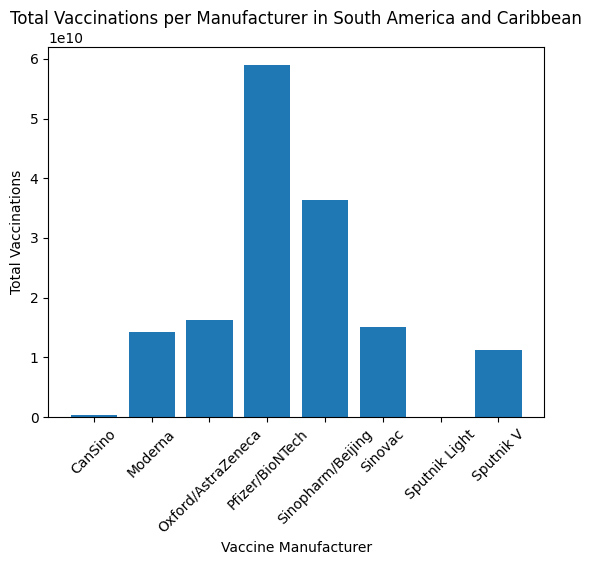

<Figure size 640x480 with 0 Axes>

In [211]:
#Plot a bar chart displaying total number of vaccines administered in South America

#First, ensure that the total vaccinations column is in fact numeric
manufacturers_df["Total Vaccinations per Manufacturer"] = pd.to_numeric(manufacturers_df["Total Vaccinations per Manufacturer"], errors='coerce')

#Plot for South America, ensuring that total vaccinations are summed for each vaccine type
saca_df = manufacturers_df[manufacturers_df["region"] == specificregion1]
grouped_data = saca_df.groupby("vaccine", as_index=False)["Total Vaccinations per Manufacturer"].sum()
plt.bar(grouped_data["vaccine"], grouped_data["Total Vaccinations per Manufacturer"])
plt.title("Total Vaccinations per Manufacturer in South America and Caribbean")
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.show()

plt.savefig("Output/saca_df.png")

As seen on the graph, the top 3 vaccines administered in South America/Caribbean are SinoPharm, AstraZeneca and Pfizer. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat/limitation: major population contributors such as Brazil are missing from this dataframe, meaning this is not entirely a complete picture. That said, there are more countries than was the case for South Asia, resulting in a somewhat more complete picture here.

In [212]:
#Filter for Europe/Central Asia as the fourth region to be plotted
specificregion2 = "Europe and Central Asia"
euca_vaccinations = manufacturers_df[manufacturers_df["region"] == specificregion2]

print(euca_vaccinations.head())
print(euca_vaccinations.dtypes)

      Unnamed: 0 location                   region        date  \
4949        4949  Austria  Europe and Central Asia  2021-01-08   
4950        4950  Austria  Europe and Central Asia  2021-01-08   
4951        4951  Austria  Europe and Central Asia  2021-01-08   
4952        4952  Austria  Europe and Central Asia  2021-01-08   
4953        4953  Austria  Europe and Central Asia  2021-01-08   

                 vaccine  Total Vaccinations per Manufacturer  
4949     Johnson&Johnson                                    0  
4950             Moderna                                    0  
4951             Novavax                                    0  
4952  Oxford/AstraZeneca                                    0  
4953     Pfizer/BioNTech                                31775  
Unnamed: 0                              int64
location                               object
region                                 object
date                                   object
vaccine                            

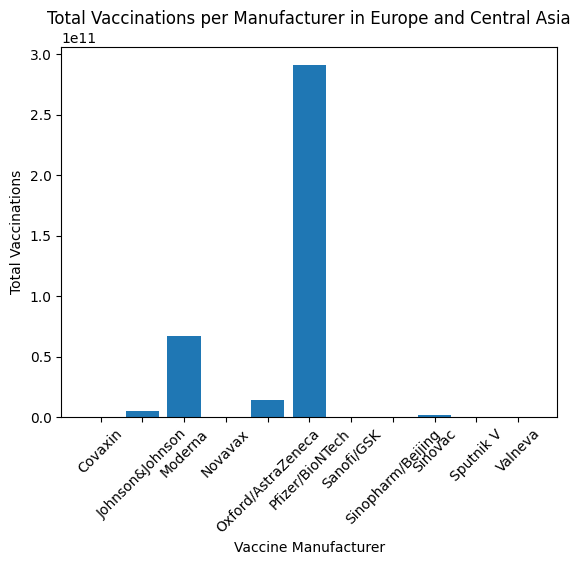

In [220]:
#Plot a bar chart displaying total number of vaccines administered in Europe/Central Asia

#First, ensure that the total vaccinations column is in fact numeric
manufacturers_df["Total Vaccinations per Manufacturer"] = pd.to_numeric(manufacturers_df["Total Vaccinations per Manufacturer"], errors='coerce')

#Plot for Europe/Central Asia, ensuring that total vaccinations are summed for each vaccine type
euca_df = manufacturers_df[manufacturers_df["region"] == specificregion2]
grouped_data = euca_df.groupby("vaccine", as_index=False)["Total Vaccinations per Manufacturer"].sum()
plt.bar(grouped_data["vaccine"], grouped_data["Total Vaccinations per Manufacturer"])
plt.title("Total Vaccinations per Manufacturer in Europe and Central Asia")
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.show()


As seen on the graph, the top 3 vaccines administered in Europe/Central Asia are Pfizer, Moderna and AstraZeneca. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Note: Majority of European countries are included, resulting in a fairly complete picture of reality, as was the case for North America. However, it cannot be said that this applies to Central Asia as no Central Asian countries are included in this analysis.

In [214]:
#Filter for Pacific/East Asia as the fifth region to be plotted
specificregion3 = "East Asia and Pacific"
eapa_vaccinations = manufacturers_df[manufacturers_df["region"] == specificregion3]

print(eapa_vaccinations)
print(eapa_vaccinations.dtypes)

       Unnamed: 0 location                 region        date  \
43481       43481    Japan  East Asia and Pacific  2021-02-17   
43482       43482    Japan  East Asia and Pacific  2021-02-18   
43483       43483    Japan  East Asia and Pacific  2021-02-19   
43484       43484    Japan  East Asia and Pacific  2021-02-22   
43485       43485    Japan  East Asia and Pacific  2021-02-24   
...           ...      ...                    ...         ...   
45664       45664    Japan  East Asia and Pacific  2023-05-06   
45665       45665    Japan  East Asia and Pacific  2023-05-06   
45666       45666    Japan  East Asia and Pacific  2023-05-07   
45667       45667    Japan  East Asia and Pacific  2023-05-07   
45668       45668    Japan  East Asia and Pacific  2023-05-07   

               vaccine  Total Vaccinations per Manufacturer  
43481  Pfizer/BioNTech                                  125  
43482  Pfizer/BioNTech                                  611  
43483  Pfizer/BioNTech           

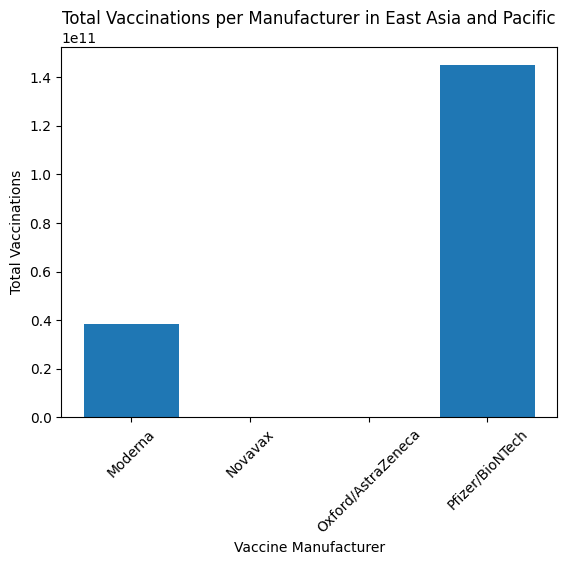

In [219]:
#Plot a bar chart displaying total number of vaccines administered in East Asia

#First, ensure that the total vaccinations column is in fact numeric
manufacturers_df["Total Vaccinations per Manufacturer"] = pd.to_numeric(manufacturers_df["Total Vaccinations per Manufacturer"], errors='coerce')

#Plot for East Asia, ensuring that total vaccinations are summed for each vaccine type
eapa_df = manufacturers_df[manufacturers_df["region"] == specificregion3]
grouped_data = eapa_df.groupby("vaccine", as_index=False)["Total Vaccinations per Manufacturer"].sum()
plt.bar(grouped_data["vaccine"], grouped_data["Total Vaccinations per Manufacturer"])
plt.title("Total Vaccinations per Manufacturer in East Asia and Pacific")
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.show()

As seen on the graph, the top vaccines administered in East Asia/Pacific are Pfizer and Moderna. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat: This dataframe only includes Japan for this region, resulting in a far from complete picture as major players such as South Korea and importantly China are excluded. Thus, this would be more of a particular snapshot as Sinovac would likely be a major player in the region due to China alone.

In [216]:
#Filter for North Africa/ Middle East as the sixth region to be plotted
specificregion4 = "Middle East and North Africa"
mena_vaccinations = manufacturers_df[manufacturers_df["region"] == specificregion4]

print(mena_vaccinations)
print(mena_vaccinations.dtypes)

       Unnamed: 0 location                        region        date  \
48746       48746    Malta  Middle East and North Africa  2021-01-01   
48747       48747    Malta  Middle East and North Africa  2021-01-08   
48748       48748    Malta  Middle East and North Africa  2021-01-08   
48749       48749    Malta  Middle East and North Africa  2021-01-15   
48750       48750    Malta  Middle East and North Africa  2021-01-15   
...           ...      ...                           ...         ...   
49165       49165    Malta  Middle East and North Africa  2023-08-11   
49166       49166    Malta  Middle East and North Africa  2023-08-11   
49167       49167    Malta  Middle East and North Africa  2023-08-25   
49168       49168    Malta  Middle East and North Africa  2023-08-25   
49169       49169    Malta  Middle East and North Africa  2023-09-01   

                  vaccine  Total Vaccinations per Manufacturer  
48746     Pfizer/BioNTech                                   57  
48747

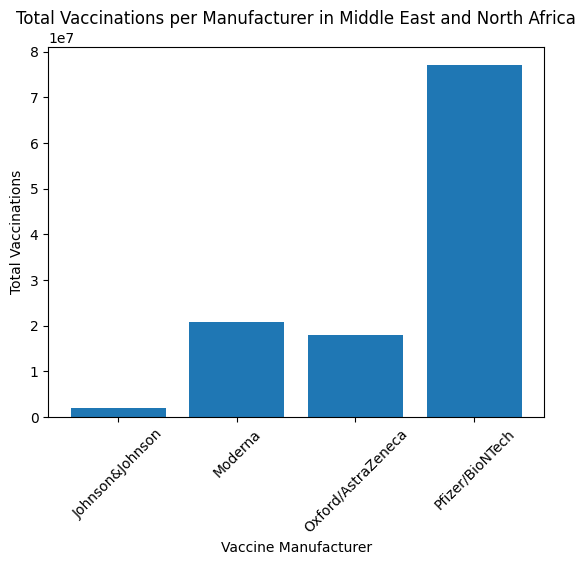

In [218]:
#Plot a bar chart displaying total number of vaccines administered in MENA

#First, ensure that the total vaccinations column is in fact numeric
manufacturers_df["Total Vaccinations per Manufacturer"] = pd.to_numeric(manufacturers_df["Total Vaccinations per Manufacturer"], errors='coerce')

#Plot for MENA, ensuring that total vaccinations are summed for each vaccine type
mena_df = manufacturers_df[manufacturers_df["region"] == specificregion4]
grouped_data = mena_df.groupby("vaccine", as_index=False)["Total Vaccinations per Manufacturer"].sum()
plt.bar(grouped_data["vaccine"], grouped_data["Total Vaccinations per Manufacturer"])
plt.title("Total Vaccinations per Manufacturer in Middle East and North Africa")
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.show()

As seen on the graph, the top vaccines administered in Middle East/North Africa are Pfizer, Moderna and AstraZeneca. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat: This dataframe only includes Malta for this region, resulting in a far from complete picture as major players such as Egypt, Saudi Arabua and more are excluded. Thus, this would be more of a particular snapshot.

In [222]:
#Filter for Sub-Saharan Africa as the last region to be plotted
specificregion5 = "Sub-Saharan Africa"
ssa_vaccinations = manufacturers_df[manufacturers_df["region"] == specificregion5]

print(ssa_vaccinations)
print(ssa_vaccinations.dtypes)

       Unnamed: 0      location              region        date  \
62363       62363  South Africa  Sub-Saharan Africa  2022-03-04   
62364       62364  South Africa  Sub-Saharan Africa  2022-03-04   
62365       62365  South Africa  Sub-Saharan Africa  2022-03-07   
62366       62366  South Africa  Sub-Saharan Africa  2022-03-07   
62367       62367  South Africa  Sub-Saharan Africa  2022-03-09   
...           ...           ...                 ...         ...   
62900       62900  South Africa  Sub-Saharan Africa  2022-12-24   
62901       62901  South Africa  Sub-Saharan Africa  2022-12-25   
62902       62902  South Africa  Sub-Saharan Africa  2022-12-25   
62903       62903  South Africa  Sub-Saharan Africa  2022-12-26   
62904       62904  South Africa  Sub-Saharan Africa  2022-12-26   

               vaccine  Total Vaccinations per Manufacturer  
62363  Johnson&Johnson                              7833589  
62364  Pfizer/BioNTech                             24156328  
62365  Jo

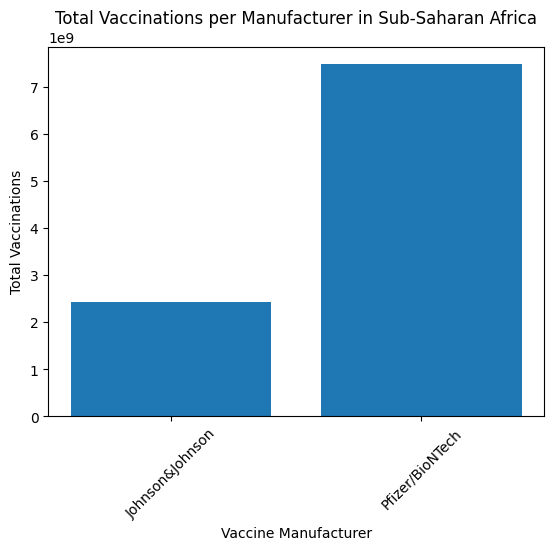

In [223]:
#Plot a bar chart displaying total number of vaccines administered in Sub-Saharan Africa

#First, ensure that the total vaccinations column is in fact numeric
manufacturers_df["Total Vaccinations per Manufacturer"] = pd.to_numeric(manufacturers_df["Total Vaccinations per Manufacturer"], errors='coerce')

#Plot for Subsaharan-Africa, ensuring that total vaccinations are summed for each vaccine type
ssa_df = manufacturers_df[manufacturers_df["region"] == specificregion5]
grouped_data = ssa_df.groupby("vaccine", as_index=False)["Total Vaccinations per Manufacturer"].sum()
plt.bar(grouped_data["vaccine"], grouped_data["Total Vaccinations per Manufacturer"])
plt.title("Total Vaccinations per Manufacturer in Sub-Saharan Africa")
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.show()

As seen on the graph, the top vaccines administered in Sub-Saharan Africa are Pfizer and Johnson&Johnson. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat: This dataframe only includes South Africa for this region, resulting in a far from complete picture as major players such as the dozens of countries in this region. Thus, this would be more of a particular snapshot.

In [ ]:
#Generate a map displaying most administered vaccine per region using Geoviews API in order to get a 
#complete picture of the top vaccines ahead of the correlation calculations